In [1]:
!pip install pandas matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import requests
import pandas as pd

In [3]:
# 统计go框架fork次数信息

frameworks = {
    "Gin":"gin-gonic/gin",
    "Beego": "astaxie/beego",
    "Iris": "kataras/iris",
    "Revel": "revel/revel",
    "Echo": "labstack/echo",
    "Buffalo": "gobuffalo/buffalo"
}


stats = {}
for name in frameworks.keys():
    url = "https://api.github.com/repos/" + frameworks[name]
    stats[name] = requests.get(url=url).json() # 获取仓库统计信息

indexs = []
forks = []
stars = []
watchs = []
openIssues = []

for name in stats:
    indexs += [name]
    forks += [stats[name]['forks_count']] # fork次数
    stars += [stats[name]['watchers_count']] # star次数
    watchs += [stats[name]['subscribers_count']] # watch次数
    openIssues += [stats[name]['open_issues_count']] # open_issue次数

df = pd.DataFrame({
    'forks':forks,
    'stars':stars,
    'watchs':watchs,
    'openIssues': openIssues
}, index = indexs)

df

,forks,stars,watchs,openIssues
Gin,4074,35455,1212,242
Beego,4688,23243,1268,813
Iris,1942,17507,683,5
Revel,1357,11575,558,87
Echo,1508,16500,551,46
Buffalo,430,5372,171,70


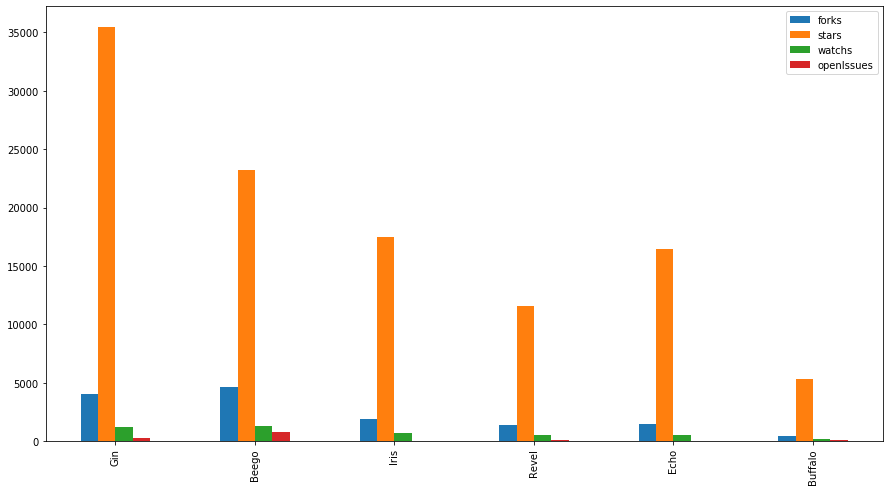

In [4]:
df.plot(kind='bar', figsize=(15, 8))